# **Getting Started with PyTorch**

An open source machine learning framework that accelerates the path from research prototying to production deployment.

In [437]:
pip install torch

# Contents:
- Basics
- Tensor Operations
- Extra PyTorch operations based on Tensor Shape
- Ouickstart- Build A Neural Network

In [438]:
import torch
import numpy as np

# Basics

Just like tensor flow , we shall continue playing with tensors in pyTorch as well.

# Create Tensor From Data(List)

In [439]:
data = [[1,2],[3,4]]
tensors = torch.tensor(data)

In [440]:
tensors

tensor([[1, 2],
        [3, 4]])

# Create from NumPy

In [441]:
np_array = np.arange(10)
tensor_np = torch.from_numpy(np_array)

In [442]:
tensor_np

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# **Shape,ndim and dtype**

In [443]:
tensor_np.shape

torch.Size([10])

In [444]:
tensor_np.ndim

1

In [445]:
tensor_np.dtype

torch.int64

# Tensor Operations

In [446]:
ten1 = torch.tensor([1,2,3])
ten2 = torch.tensor([4,5,6])
ten1 + ten2

tensor([5, 7, 9])

In [447]:
#we can either use + or torch.add to perform addition operations
torch.add(ten1,ten2)

tensor([5, 7, 9])

In [448]:
#You can either use - or torch.sub to perform Tensor Additions
torch.sub(ten2,ten1)

tensor([3, 3, 3])

In [449]:
torch.subtract(ten2,ten1)

tensor([3, 3, 3])

In [450]:
ten1*10

tensor([10, 20, 30])

# **very important operation in Deep Learning- Matrix Multiplication**

In [451]:
torch.matmul(ten1,ten2)

tensor(32)

In [452]:
matrix4_3 = torch.tensor([[1,2,3],
                          [4,5,6],
                          [7,8,9],
                          [10,11,12]])

In [453]:
matrix4_3.shape

torch.Size([4, 3])

In [454]:
matrix3_2 = torch.tensor([[1,2],
                          [3,4],
                          [5,6]])

In [455]:
matrix3_2.shape

torch.Size([3, 2])

In [456]:
result = torch.matmul(matrix4_3,matrix3_2)

In [457]:
result

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [458]:
result.shape

torch.Size([4, 2])

In [459]:
#You can also use torch.mm() which is a short for torch.matmul()
torch.mm(matrix4_3,matrix3_2)

tensor([[ 22,  28],
        [ 49,  64],
        [ 76, 100],
        [103, 136]])

In [460]:
#transpose of tensor
matrix4_3

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])

In [461]:
matrix4_3.T

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

In [462]:
torch.t(matrix4_3)

tensor([[ 1,  4,  7, 10],
        [ 2,  5,  8, 11],
        [ 3,  6,  9, 12]])

#Extra_PyTorch_operations_based_on_Tensor_Shape
- Zeros
- Ones
- Random
- Full

In [463]:
tensorZeroes = torch.zeros((3,3))
tensorZeroes

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [464]:
tensorOnes = torch.ones((3,3))
tensorOnes

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [465]:
#includes negative tensors
tensorRandomN = torch.randn((3,3))
tensorRandomN

tensor([[ 0.0742,  0.6129, -0.0464],
        [ 0.7880,  0.8846,  1.5364],
        [-1.3612, -0.8092, -0.2072]])

In [466]:
#includes positive tensors
tensorRandom = torch.rand((3,3))
tensorRandom

tensor([[0.6291, 0.1025, 0.5649],
        [0.4269, 0.7863, 0.2080],
        [0.0363, 0.3820, 0.5225]])

In [467]:
customFill = torch.full((3,3),5)
customFill

tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])

In [468]:
initialFill = torch.full((3,3),0.01)
initialFill

tensor([[0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100],
        [0.0100, 0.0100, 0.0100]])

# Quickstart

Install Torchvision, The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [469]:
pip install torchvision --no-deps

In [470]:
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch import nn

In [471]:
#download training data from open datasets
training_data = datasets.FashionMNIST(root="data",
                                      train=True,
                                      download=True,
                                      transform=ToTensor(),)

In [472]:
#download test data from open datasets
test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),)

In [473]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

Dataloader wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

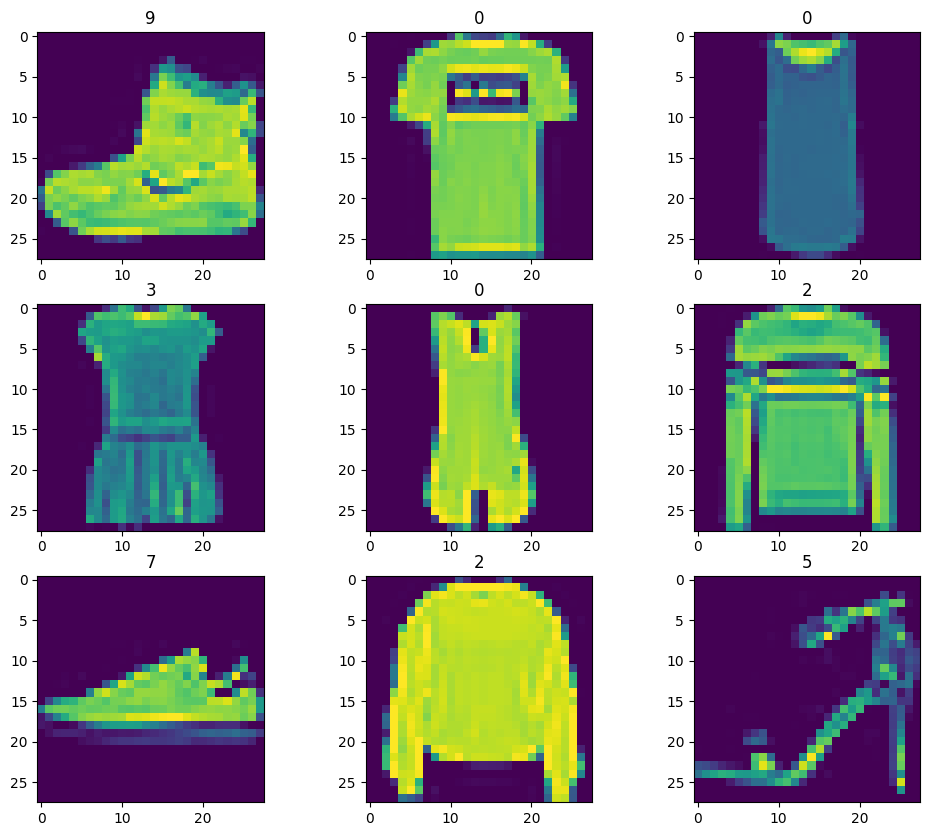

In [474]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  sample_image,sample_label = training_data[i]
  plt.imshow(sample_image[0])
  plt.title(sample_label)

In [475]:
batch_size = 64

training = DataLoader(training_data,batch_size=batch_size)
testing = DataLoader(test_data,batch_size=batch_size)

for X,y in testing:
  print(f"shape of X:{X.shape}")
  print(f"Shape of y:{y.shape}")
  break


shape of X:torch.Size([64, 1, 28, 28])
Shape of y:torch.Size([64])


In [476]:
for X,y in training:
  print(torch.max(X))
  print(torch.min(X))
  break

tensor(1.)
tensor(0.)


# Model building

Define a neural network class by subclassing nn.Module, and initialize the neural network layers in __init__. Every nn.Module subclass implements the operations on input data in the forward method.

In [477]:
import os
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

In [478]:

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

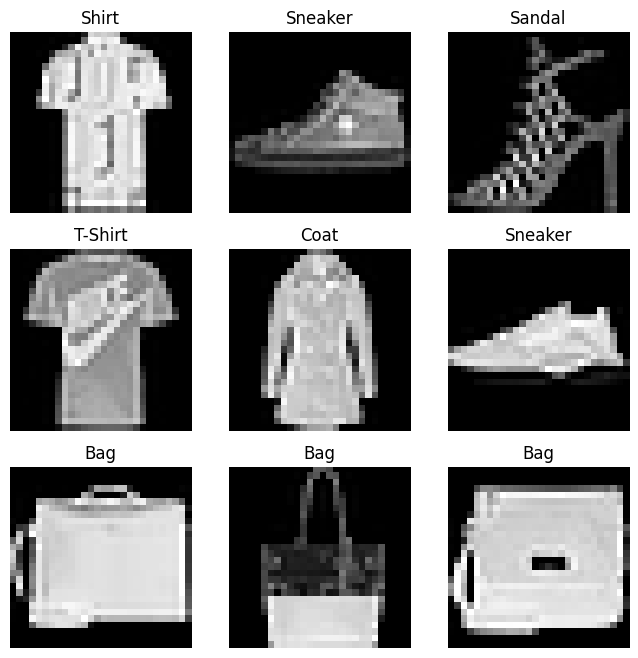

In [479]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [480]:

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [481]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [482]:
def __len__(self):
    return len(self.img_labels)

In [483]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [484]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


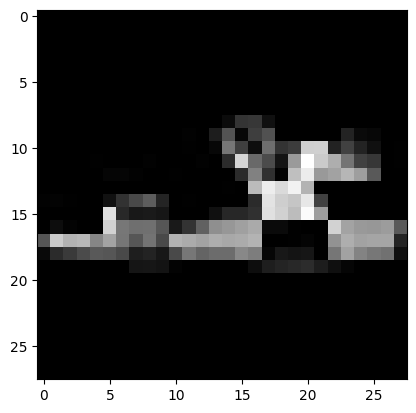

Label: 5


In [485]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Transforms

In [486]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

# Lambda Transforms

In [487]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

# Build Neural Network

In [488]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [489]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [490]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [491]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([2])


In [492]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [493]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [494]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [495]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.0465,  0.2443,  0.1290,  0.2648,  0.6199, -0.0971,  0.0598,  0.4139,
         -0.2940, -0.0229,  0.3103, -0.2264, -0.3163,  0.5080, -0.3912, -0.0907,
         -0.0250, -0.5970, -0.4393, -0.0211],
        [-0.1389,  0.1916,  0.0022,  0.0370,  0.2674,  0.2050,  0.1759,  0.0800,
         -0.4191, -0.2707,  0.2920, -0.6815, -0.3629,  0.1418, -0.5762, -0.3981,
         -0.3400,  0.0526, -0.2607, -0.2286],
        [-0.4906,  0.4239,  0.0652, -0.0650,  0.4937, -0.1046,  0.3610,  0.1253,
         -0.7617, -0.2076, -0.0639,  0.0774, -0.3850,  0.0451, -0.3990, -0.2079,
         -0.0211,  0.0355, -0.2598,  0.0078]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.2443, 0.1290, 0.2648, 0.6199, 0.0000, 0.0598, 0.4139, 0.0000,
         0.0000, 0.3103, 0.0000, 0.0000, 0.5080, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.1916, 0.0022, 0.0370, 0.2674, 0.2050, 0.1759, 0.0800, 0.0000,
         0.0000, 0.2920, 0.0000, 0.0000, 0.1418, 0.00

In [496]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [497]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [498]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0084,  0.0217,  0.0101,  ...,  0.0334,  0.0341, -0.0257],
        [ 0.0132, -0.0010,  0.0194,  ...,  0.0016, -0.0168,  0.0099]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0158, 0.0180], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0207,  0.0277, -0.0020,  ...,  0.0426, -0.0160,  0.0241],
        [ 0.0132, -0.0153, -0.0293,  ..., -0.0162,  0.0105, -0.0315]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si

# AUTOMATIC DIFFERENTIATION WITH TORCH.AUTOGRAD

In [499]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [500]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7e95edd42a40>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7e95edd421d0>


In [501]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.1667, 0.3213, 0.0272],
        [0.1667, 0.3213, 0.0272],
        [0.1667, 0.3213, 0.0272],
        [0.1667, 0.3213, 0.0272],
        [0.1667, 0.3213, 0.0272]])
tensor([0.1667, 0.3213, 0.0272])


In [502]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


In [503]:
z = torch.matmul(x, w)+b
z_det = z.detach()
print(z_det.requires_grad)

False


In [504]:
inp = torch.eye(4, 5, requires_grad=True)
out = (inp+1).pow(2).t()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"First call\n{inp.grad}")
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nSecond call\n{inp.grad}")
inp.grad.zero_()
out.backward(torch.ones_like(out), retain_graph=True)
print(f"\nCall after zeroing gradients\n{inp.grad}")

First call
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])

Second call
tensor([[8., 4., 4., 4., 4.],
        [4., 8., 4., 4., 4.],
        [4., 4., 8., 4., 4.],
        [4., 4., 4., 8., 4.]])

Call after zeroing gradients
tensor([[4., 2., 2., 2., 2.],
        [2., 4., 2., 2., 2.],
        [2., 2., 4., 2., 2.],
        [2., 2., 2., 4., 2.]])


# OPTIMIZING MODEL PARAMETERS

In [517]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [518]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [519]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [520]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [521]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )


    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [522]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [523]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [524]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [525]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301145  [   64/60000]
loss: 2.290783  [ 6464/60000]
loss: 2.269409  [12864/60000]
loss: 2.262680  [19264/60000]
loss: 2.252881  [25664/60000]
loss: 2.206484  [32064/60000]
loss: 2.221891  [38464/60000]
loss: 2.188694  [44864/60000]
loss: 2.190364  [51264/60000]
loss: 2.143981  [57664/60000]
Test Error: 
 Accuracy: 33.2%, Avg loss: 2.145853 

Epoch 2
-------------------------------
loss: 2.161146  [   64/60000]
loss: 2.147975  [ 6464/60000]
loss: 2.086909  [12864/60000]
loss: 2.099793  [19264/60000]
loss: 2.046879  [25664/60000]
loss: 1.975944  [32064/60000]
loss: 2.011691  [38464/60000]
loss: 1.931726  [44864/60000]
loss: 1.946941  [51264/60000]
loss: 1.851991  [57664/60000]
Test Error: 
 Accuracy: 53.9%, Avg loss: 1.860156 

Epoch 3
-------------------------------
loss: 1.899827  [   64/60000]
loss: 1.861101  [ 6464/60000]
loss: 1.747956  [12864/60000]
loss: 1.787128  [19264/60000]
loss: 1.672428  [25664/60000]
loss: 1.627520  [32064/600

In [526]:
import torch
import torchvision.models as models

In [527]:
model = models.vgg16(weights='IMAGENET1K_V1')
torch.save(model.state_dict(), 'model_weights.pth')

In [528]:
model = models.vgg16() # we do not specify ``weights``, i.e. create untrained model
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [529]:
torch.save(model, 'model.pth')

In [531]:
model = torch.load('model.pth')